### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [2]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [3]:
initial_data.shape[0] == processed_data.shape[0]

True

In [4]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [5]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [6]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [7]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

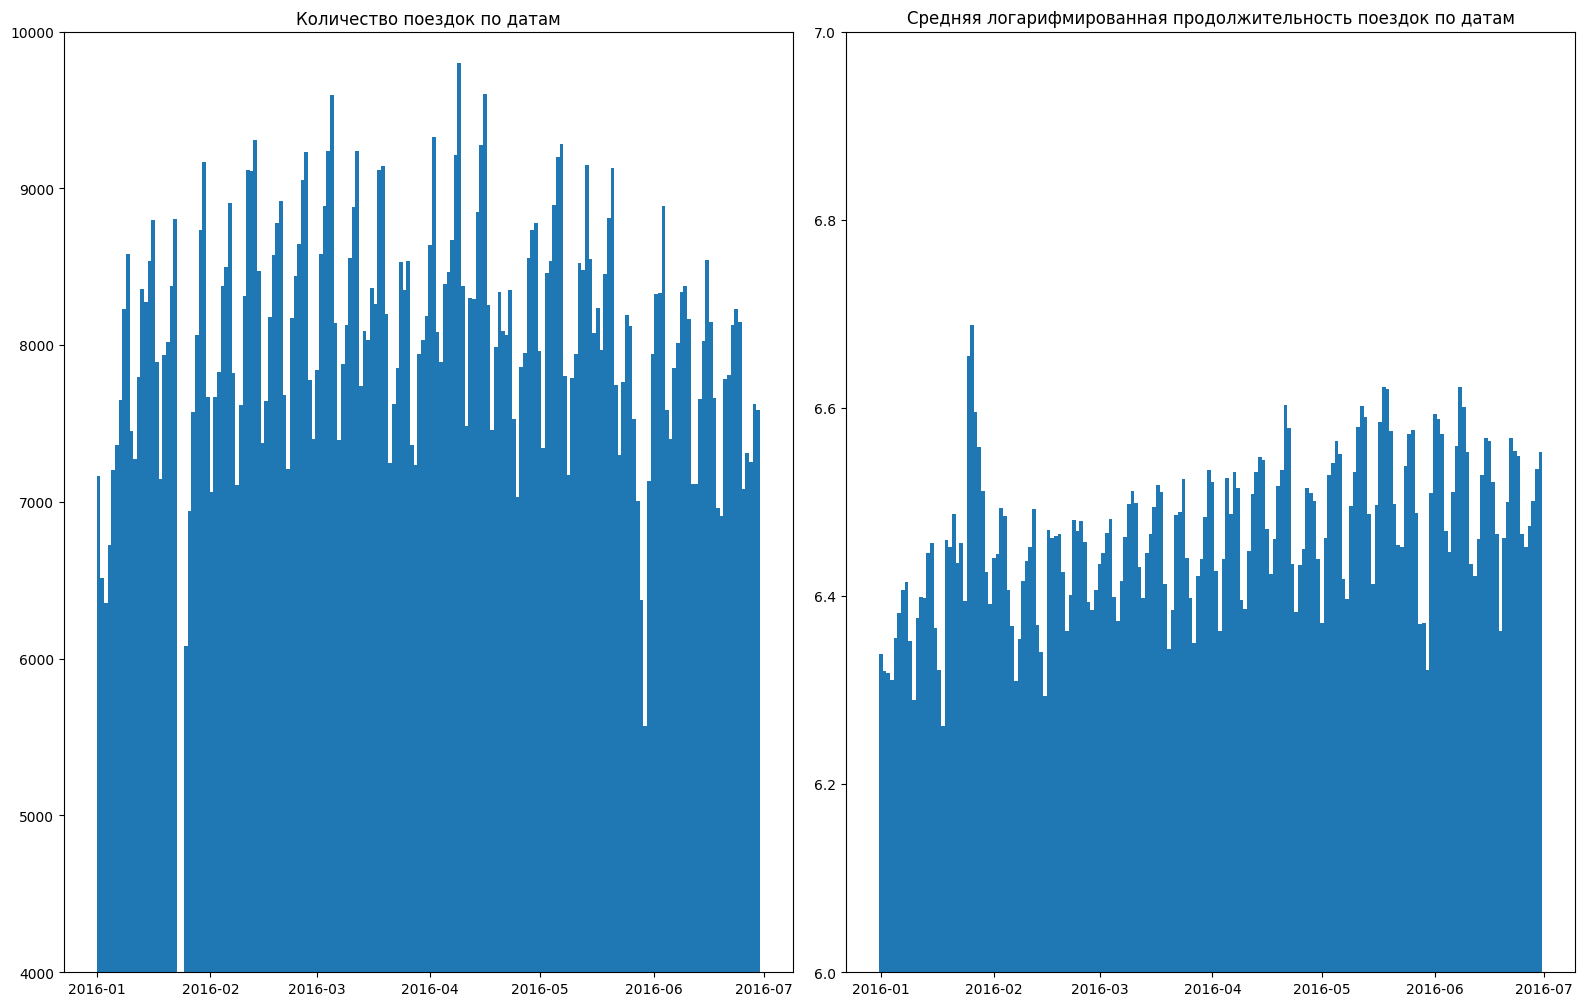

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


In [9]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [10]:
df_by_day_of_week = processed_data.groupby('day_of_week', as_index=False).agg(mean_log_trip_duration=('log_trip_duration', 'mean'))
df_by_month = processed_data.groupby(['month', 'day_of_week'], as_index=False).agg(mean_log_trip_duration=('log_trip_duration', 'mean'))
df_by_hour = processed_data.groupby('hour', as_index=False).agg(mean_log_trip_duration=('log_trip_duration', 'mean'))

[Text(0.5, 1.0, 'By HOUR')]

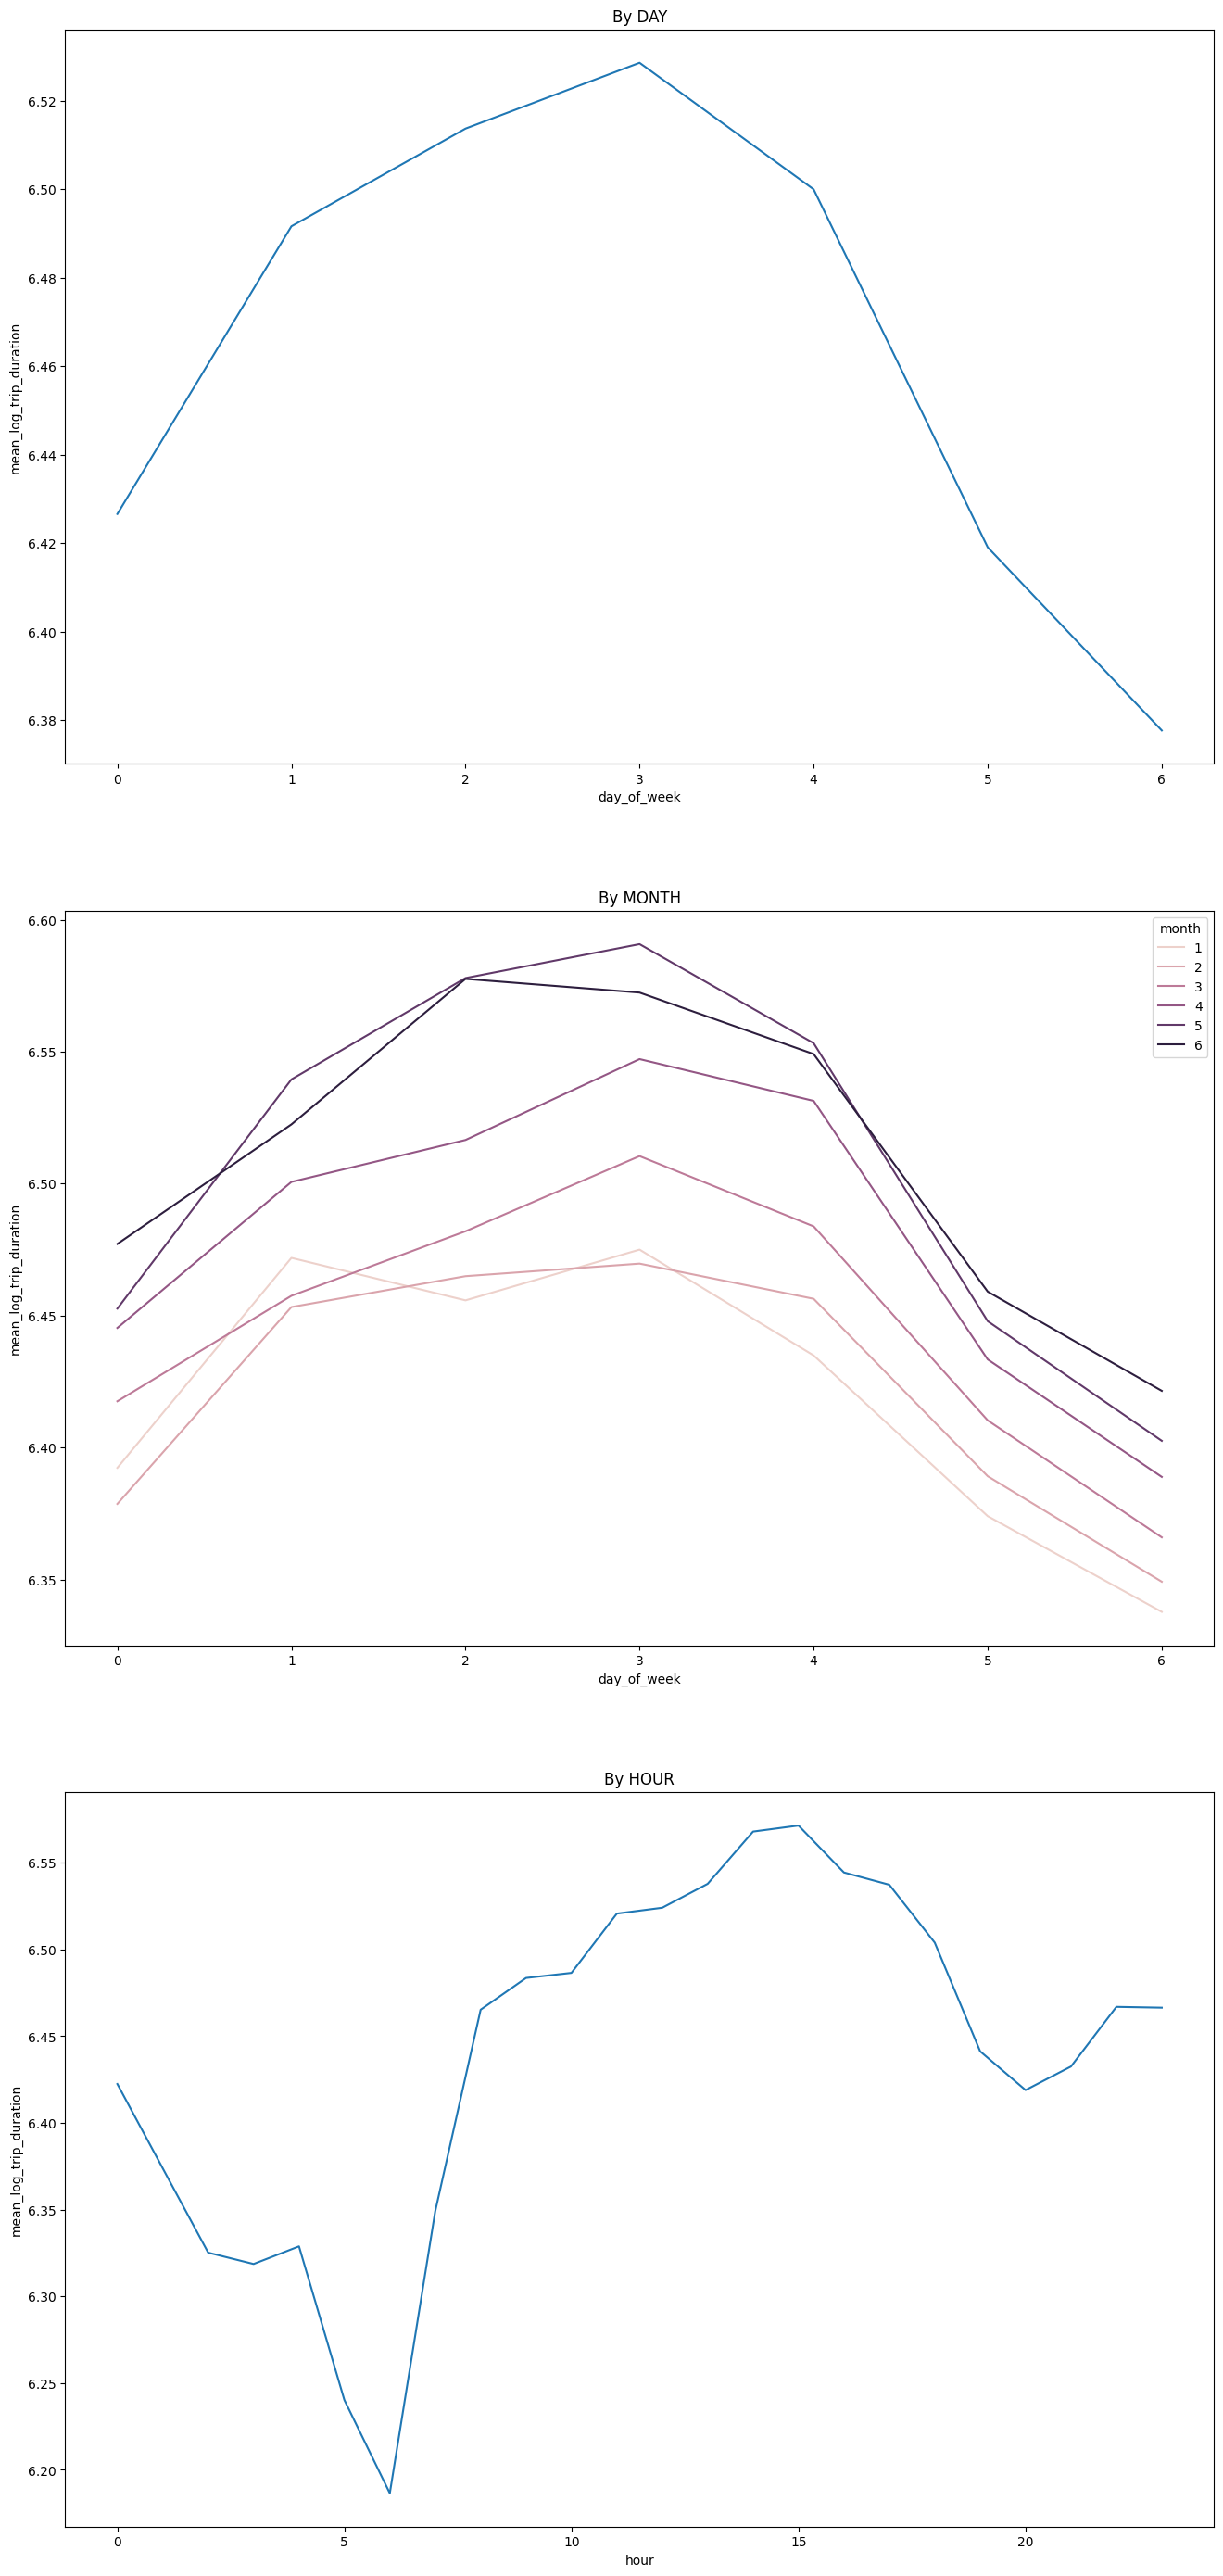

In [11]:
fig = plt.figure()

fig.set_size_inches(16, 35)

ax_1 = fig.add_subplot(3, 1, 1)
sns.lineplot(data=df_by_day_of_week, x='day_of_week', y='mean_log_trip_duration')
ax_1.set(title='By DAY')

ax_2 = fig.add_subplot(3, 1, 2)
sns.lineplot(data=df_by_month, x='day_of_week', y='mean_log_trip_duration', hue='month')
ax_2.set(title='By MONTH')

ax_3 = fig.add_subplot(3, 1, 3)
sns.lineplot(data=df_by_hour, x='hour', y='mean_log_trip_duration')
ax_3.set(title='By HOUR')


In [12]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [13]:
processed_data.groupby('hour', as_index=False).agg(mean_log_trip_duration=('log_trip_duration', 'mean'))

,hour,mean_log_trip_duration
0,0,6.422417
1,1,6.373789
2,2,6.325211
3,3,6.318661
4,4,6.328824
5,5,6.240214
6,6,6.186512
7,7,6.349027
8,8,6.465236
9,9,6.483529


In [14]:
(processed_data.groupby('hour', as_index=False).agg(count_of_trip=('log_trip_duration', 'count'))).merge(processed_data.groupby('hour', as_index=False).agg(mean_log_trip_duration=('log_trip_duration', 'mean')), on='hour').drop('hour', axis=1).corr()

,count_of_trip,mean_log_trip_duration
count_of_trip,1.00000,0.76506
mean_log_trip_duration,0.76506,1.00000


Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [15]:
processed_data[pd.to_datetime(processed_data['date']) == '2016-01-23']

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id1027675,1,930.399753,0,1.001201,7.088409,2016-01-23 08:46:42,2016-01-23,5,8,1
id2657420,0,930.399753,0,7.044418,7.163172,2016-01-23 00:06:25,2016-01-23,5,0,1
id3382236,1,1070.232174,0,1.268585,5.808142,2016-01-23 10:38:43,2016-01-23,5,10,1
id2636301,1,930.399753,0,3.689727,6.885510,2016-01-23 01:16:58,2016-01-23,5,1,1
id0252677,1,1070.232174,0,3.358010,6.889591,2016-01-23 00:19:01,2016-01-23,5,0,1
...,...,...,...,...,...,...,...,...,...,...
id2645547,1,930.399753,0,1.001283,5.552960,2016-01-23 11:36:46,2016-01-23,5,11,1
id1907515,1,1028.236276,0,0.000000,6.133398,2016-01-23 01:08:39,2016-01-23,5,1,1
id1950275,0,1005.458335,0,4.712631,6.927558,2016-01-23 03:14:57,2016-01-23,5,3,1


In [16]:
### Создадим первый бинарный признак
processed_data.loc[(pd.to_datetime(processed_data['date']) == '2016-01-23'), 'anomaly'] = 1
processed_data['anomaly'] = processed_data['anomaly'].fillna(0)


In [17]:
### Создадим второй бинарный признак

processed_data_by_day_and_hour = processed_data.groupby(['day_of_week', 'hour'], as_index=False).agg(mean_log_trip_duration=('log_trip_duration', 'mean')).sort_values(by='mean_log_trip_duration', ascending=False)

In [18]:
processed_data_by_day_and_hour.head(10)

,day_of_week,hour,mean_log_trip_duration
86,3,14,6.669526
87,3,15,6.650622
63,2,15,6.647091
59,2,11,6.644226
61,2,13,6.640205
62,2,14,6.638930
35,1,11,6.635141
83,3,11,6.635055
111,4,15,6.632537
88,3,16,6.630965


In [19]:
rush_hours = processed_data_by_day_and_hour.head(10)[['day_of_week', 'hour']].reset_index(drop=True)
rush_hours

,day_of_week,hour
0,3,14
1,3,15
2,2,15
3,2,11
4,2,13
5,2,14
6,1,11
7,3,11
8,4,15
9,3,16


In [20]:
condition = processed_data[['day_of_week', 'hour']].apply(tuple, axis=1).isin(rush_hours.apply(tuple, axis=1))
processed_data.loc[condition, 'traffic_jam'] = 1
processed_data['traffic_jam'] = processed_data['traffic_jam'].fillna(0)


In [30]:
processed_data['anomaly'] = processed_data['anomaly'].astype(int)
processed_data['traffic_jam'] = processed_data['traffic_jam'].astype(int)

In [21]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0.0,0.0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0.0,0.0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0.0,1.0
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0.0,0.0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0.0,0.0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [22]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [23]:
### Делаем OneHotEncoding и конкатим с processed_data

for col in ['day_of_week', 'hour', 'month']:
    ohe = pd.get_dummies(data=processed_data[col], drop_first=True, prefix=col).astype(int)
    processed_data = pd.concat([processed_data.drop(col, axis=1), ohe], axis=1)
    

In [31]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
processed_data.head(5).to_csv('solution_4', sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [35]:
processed_data[['distance_km', 'passenger_count']].corr()

,distance_km,passenger_count
distance_km,1.000000,0.016596
passenger_count,0.016596,1.000000


In [26]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0.0,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0.0,0.0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()
sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=5)

X = processed_data.drop('log_trip_duration', axis=1)
y = processed_data['log_trip_duration']

sfs.fit(X, y)

sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [41]:
### Перечислите фичи, которые окажутся наиболее желанными
X.loc[:, sfs.get_support()]


,distance_km,traffic_jam,day_of_week_6,hour_5,hour_6
id,,,,,
id2875421,1.500479,0,0,0,0
id2377394,1.807119,0,1,0,0
id3858529,6.392080,1,0,0,0
id3504673,1.487155,0,0,0,0
id2181028,1.189925,0,0,0,0
...,...,...,...,...,...
id2376096,1.226296,0,0,0,0
id1049543,6.056935,0,1,0,0
id2304944,7.832952,0,0,0,1


In [43]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?
from sklearn.metrics import mean_squared_error

X_new = X.loc[:, sfs.get_support()]

model.fit(X_new, y)



LinearRegression()

In [44]:
predict = model.predict(X_new)

In [46]:
mean_squared_error(y, predict).round(3)

0.415